### architectural modifications
- explicit weighing of conjunctions in EM key
    - stim_weight = 1, context_weight = 0.0005
- EM value is taken from feed forward pathway 

#### consider
- turn WM pathway off during test phase

In [10]:
import torch as tr
import numpy as np

import itertools

from PM_models import *
from PM_tasks import *
from help_amtask import *

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# global

In [11]:
wmsizeL = [4,5,6]
nmapsL = [4,5,6]
switchL = [1]
ntrL = [2,3]

# train acc


In [12]:
def load_trsc_subj(wmsize,nmaps,switch,ntr,seed):
  ''' [neps,ntrs,nmaps+trlen]
  '''
  fdir = 'model_data/amtask-barcode2/'
  fpath = 'wmsize_%i-nmaps_%i-switch_%i-ntrials_%i-seed_%i.npy'%(wmsize,nmaps,switch,ntr,seed)
  return np.load(fdir+fpath)

def load_trsc(wmsize,nmaps,switch,ntr,nnets=20):
  ''' returns [nsubs,neps,ntrs,nmaps+trlen]'''
  L = []
  for seed in range(nnets):
    try:
      trac_subj = load_trsc_subj(wmsize,nmaps,switch,ntr,seed)
      L.append(trac_subj)
    except:
      continue
  return np.array(L)

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1a2af9d1e0> (for post_execute):


KeyboardInterrupt: 

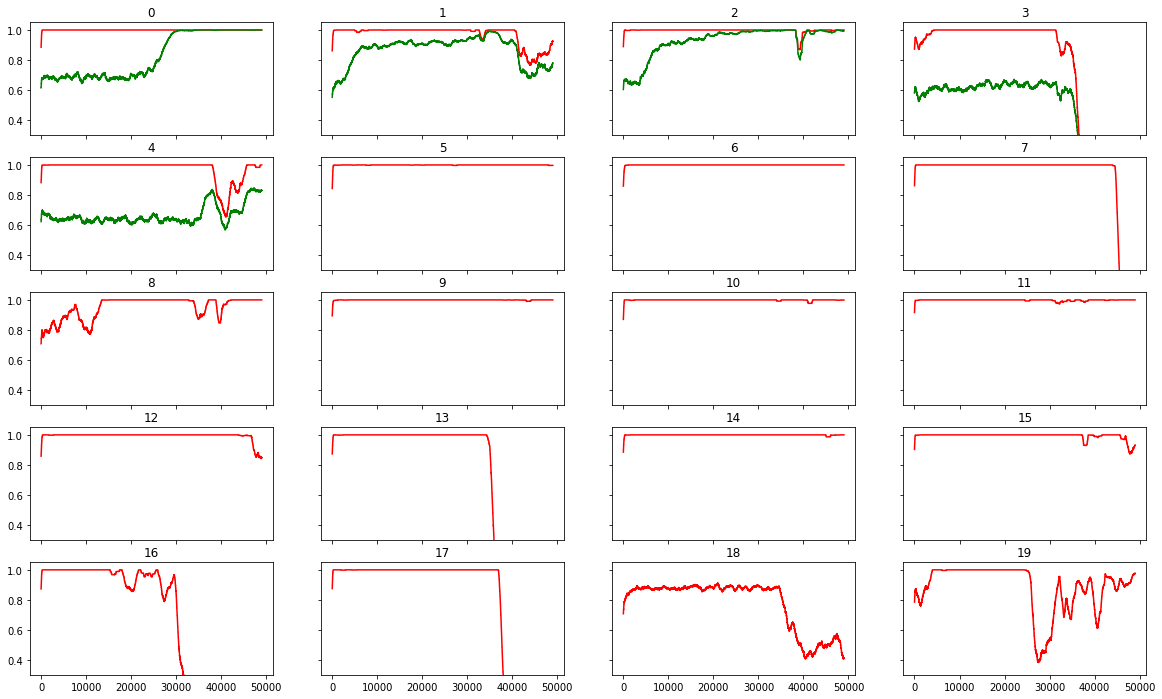

In [13]:
nnets_plt = 20
cL = ['r','g','b']
for wmsize,nmaps,switch,ntr in itertools.product(wmsizeL,nmapsL,switchL,ntrL):
  plt.close('all')
  fig,axarr = plt.subplots(5,4,figsize=(20,12),sharex=True,sharey=True);axarr = axarr.reshape(-1)

  for trial in range(ntr):
    for sub in range(nnets_plt):
      ax = axarr[sub]
      ax.set_title(sub)
      trsc = load_trsc_subj(wmsize,nmaps,switch,ntr,sub)
      trac = mov_avg(trsc[:,trial,nmaps:],1000)
      ax.plot(trac,c=cL[trial])
      ax.set_ylim(.3,1.05)

  fname = 'wmsize_%i-nmaps_%i-ntr_%i-switch_%i'%(wmsize,nmaps,ntr,switch)
  plt.savefig('figures/amtask-barcodes2/trac/'+fname)

# train & eval

In [32]:
emsetting=1
wmsize=4
instdim=10
stimdim=12
seed=2

net = NetBarCode(
        wmsize=wmsize,
        emsetting=emsetting,
        seed=seed,
        instdim=instdim,
        stimdim=stimdim,
        debug=False)

net.retrieve_mode = 'argmin'
net.emk_weights = tr.nn.Parameter([1,0]) # stim,lstm

nmaps = 4
switch = 1

task = TaskArbitraryMaps(
          nmaps,
          switchmaps=switch,
          ntokens_surplus=0,
          seed=seed,
          stimdim=stimdim)

In [134]:
print(net.emk_weights)
net.debug=False
neps = 5000
task.switchmaps = True
trsc = run_net(net,task,neps,2,1,training=True,verb=True)
trac = trsc[:,:,nmaps:].mean(2)
print(net.emk_weights)

Parameter containing:
tensor([1., 0.])
0.0 0.0
0.2 1.0
0.4 1.0
0.6 1.0
0.8 1.0
Parameter containing:
tensor([1., 0.])


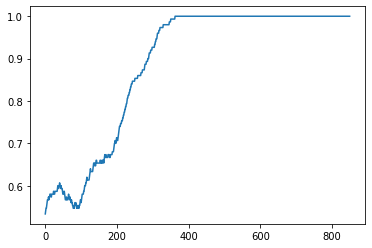

In [135]:
for trtrac in trac.T:
  plt.plot(mov_avg(trtrac,150))

In [117]:
print(net.emk_weights)
net.debug=True
neps = 1
task.switchmaps = True
trsc = run_net(net,task,neps,1,1,training=True,verb=True)
print(net.emk_weights)

Parameter containing:
tensor([1., 0.])
tensor(0.4360)
tensor(0.1272)
tensor(0.1346)
tensor(0.5356)
tensor(0.5356)
0.0 0.8
Parameter containing:
tensor([1., 0.])


# exp script

In [17]:
import torch as tr

In [23]:
fpath = 'wmsize_4-nmaps_4-switch_1-ntrials_2-seed_0-wm_emkw_0.000500-states.npy'
fdir = 'model_data/amtask_barcode_split/'
np.load(fdir+fpath).shape

(50, 10, 2, 4)

# sim funs

(-1, 1)

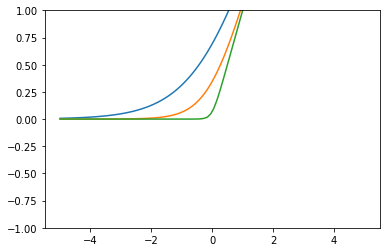

In [122]:
''' softplus'''
x = np.linspace(-5,5,100)
for beta in [1,2,10]:
  f = lambda x: (1/beta)*np.log((1+np.exp(beta*x)))
  y = f(x)
  plt.plot(x,y)
plt.ylim(-1,1)


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


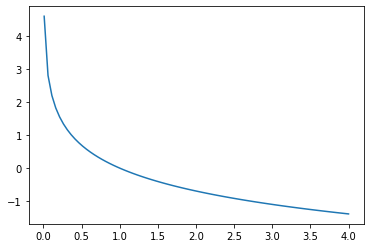

In [59]:

x = np.linspace(-1,4,100)
f = lambda x: -np.log(x)
k = f(x)
plt.plot(x,k)
# pairwise_distances(x,em,metric='cosine').squeeze()